<a href="https://colab.research.google.com/github/BossOfTheCode/ml/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Итоговое задание

## РИ-481223 Туленов Чингис Амантаевич

## Вариант 17

# Ход работы

## 1. Импортируем библиотеки и загрузим данные из файла для своего варианта:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

file = open('17.txt', 'r', encoding='utf-8')
raw_data = file.readlines()
file.close()
data = []
for line in raw_data:
  data.append(line.rstrip())
data = list(map(float, data))

X = np.array(data)
print(len(X))

340


## 2. Визуализируем данные:

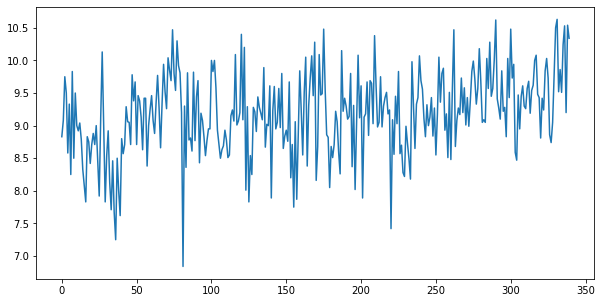

In [3]:
plt.figure(figsize= (10, 5))
plt.plot(X)
plt.show()

## 3. Оцените мат. ожидание, дисперсию данных:


In [4]:
M = np.mean(X)
D = np.var(X)
print("Мат. ожидание = ", M)
print("Дисперсия = ", D)

Мат. ожидание =  9.179617647058823
Дисперсия =  0.40043779498269894


Проверим с помощью критерия Фишера две половинки исходного ВР на соответствие дисперсий:

In [5]:
import scipy.stats as stats

stats.f_oneway(X[:len(X)//2], X[len(X)//2:])

F_onewayResult(statistic=20.063882384170853, pvalue=1.026064569017212e-05)

Значение p меньше 0.05, следовательно нулевая гипотеза о постоянстве дисперсий отклоняется и проводить проверку с помощью критерия Стьюдента двух половинок исходного ВР на соответствие мат. ожиданий не требуется.

Предположительно ВР не является стационарным, и в нем есть некоторый тренд.

Проведем KPSS-тест:


In [6]:
from statsmodels.tsa import api as tsa

tsa.kpss(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(0.9280635220613523,
 0.01,
 17,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

Статистика KPSS-теста больше нуля, а значение p меньше 0.05. Нулевая гипотеза о стационарности ВР отвергается и принимается альтернативная гипотеза - ВР нестационарен.

## 4. Постройте периодограмму и спектрограмму выбранного ряда:

Поскольку ВР является нестационарным, то спектральные оценки не будут иметь никакого смысла.

## 5. Постройте наиболее подходящий тренд для данных:

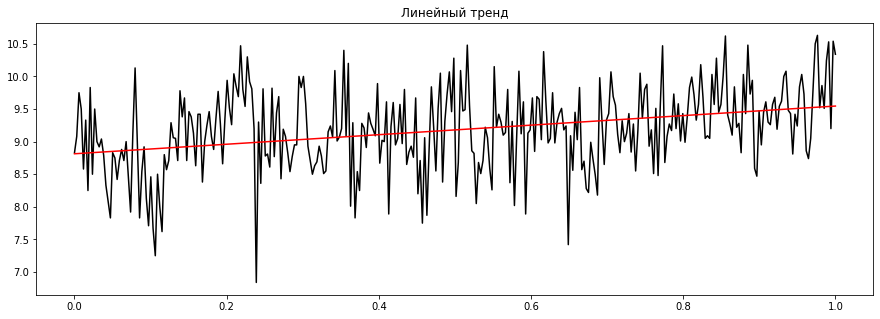

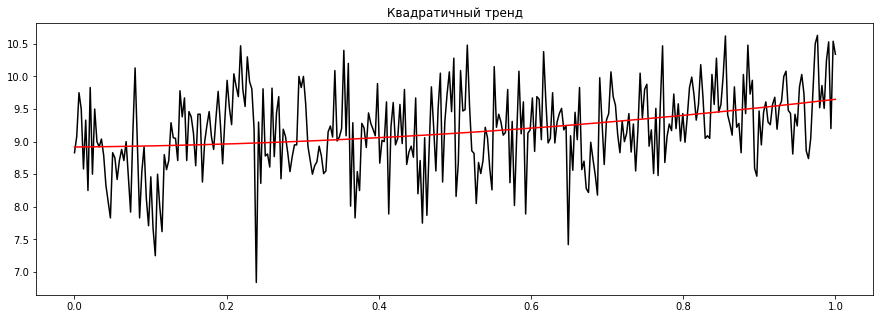

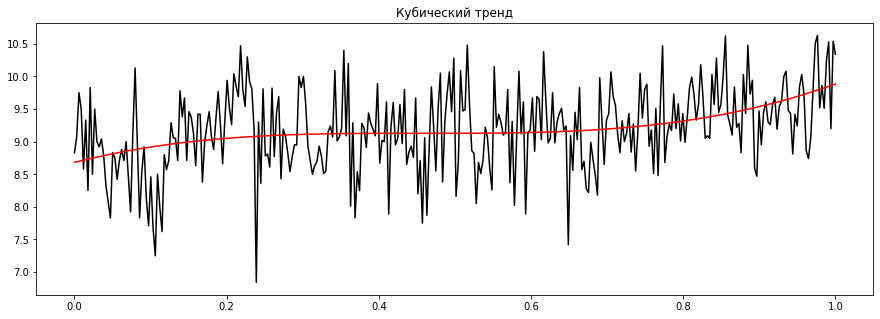

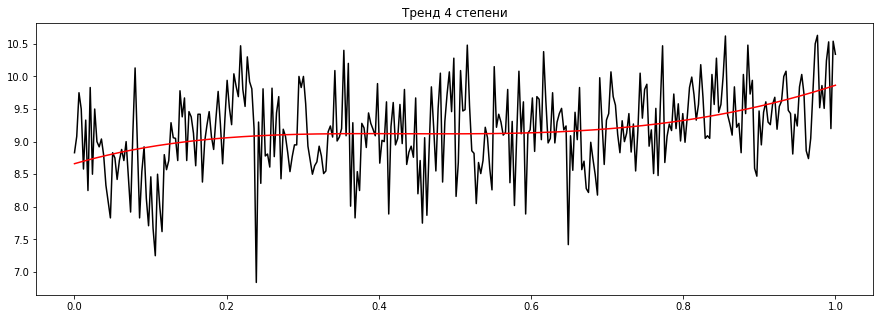

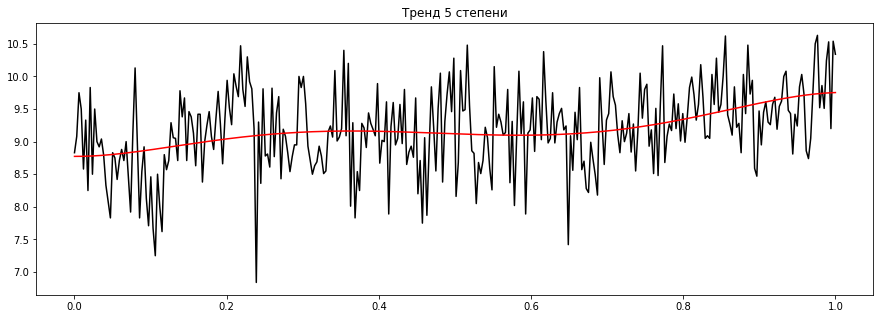

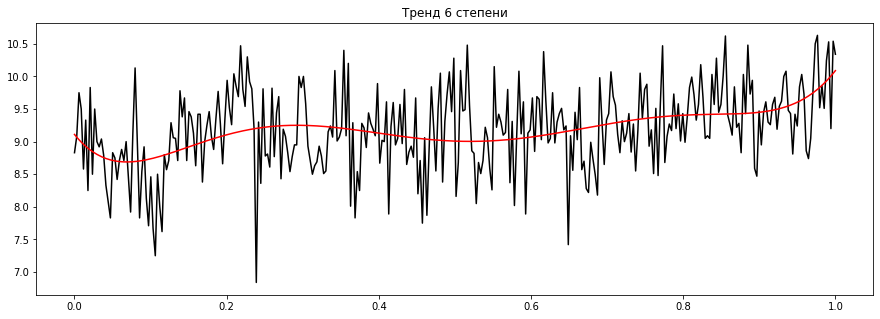

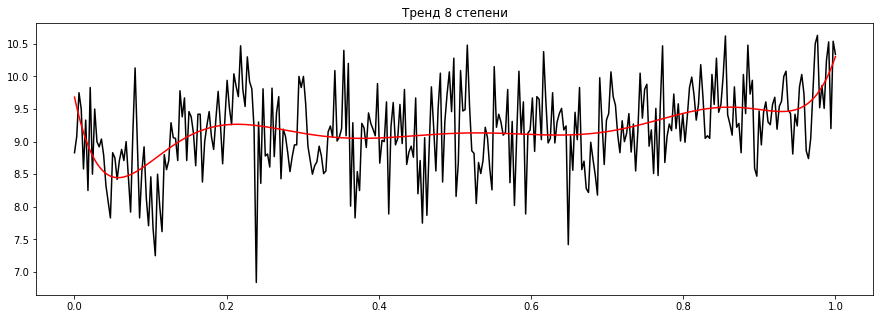

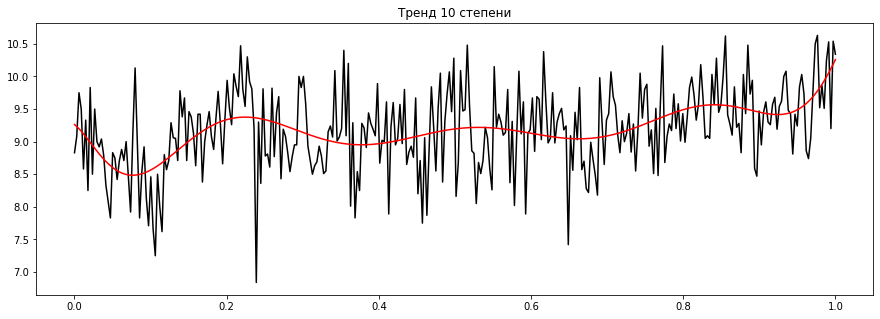

In [8]:
from scipy.optimize import curve_fit

t = np.linspace(0, 1, len(X))

def func_1(t, b0, b1): #Тренд 1 степени
    return b0 + b1 * t

def func_2(t, b0, b1, b2): #Тренд 2 степени
    return b0 + b1 * t + b2 * t ** 2

def func_3(t, b0, b1, b2, b3): #Тренд 3 степени
    return b0 + b1 * t + b2 * t ** 2 + b3 * t ** 3

def func_4(t, b0, b1, b2, b3, b4): #Тренд 4 степени
    return b0 + b1 * t + b2 * t ** 2 + b3 * t ** 3 + b4 * t ** 4

def func_5(t, b0, b1, b2, b3, b4, b5): #Тренд 6 степени
    return b0 + b1 * t + b2 * t ** 2 + b3 * t ** 3 + b4 * t ** 4 + b5 * t ** 5

def func_6(t, b0, b1, b2, b3, b4, b5, b6): #Тренд 6 степени
    return b0 + b1 * t + b2 * t ** 2 + b3 * t ** 3 + b4 * t ** 4 + b5 * t ** 5 + b6 * t ** 6

def func_8(t, b0, b1, b2, b3, b4, b5, b6, b7, b8): #Тренд 8 степени
    return b0 + b1 * t + b2 * t ** 2 + b3 * t ** 3 + b4 * t ** 4 + b5 * t ** 5 + b6 * t ** 6 + b7 * t ** 7 + b8 * t ** 8

def func_10(t, b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10): #Тренд 10 степени
    return b0 + b1 * t + b2 * t ** 2 + b3 * t ** 3 + b4 * t ** 4 + b5 * t ** 5 + b6 * t ** 6 + b7 * t ** 7 + b8 * t ** 8 + b9 * t ** 9 + b10 * t ** 10

popt_1, pcov_1 = curve_fit(func_1, t, X)
popt_2, pcov_2 = curve_fit(func_2, t, X)
popt_3, pcov_3 = curve_fit(func_3, t, X)
popt_4, pcov_4 = curve_fit(func_4, t, X)
popt_5, pcov_5 = curve_fit(func_5, t, X)
popt_6, pcov_6 = curve_fit(func_6, t, X)
popt_8, pcov_8 = curve_fit(func_8, t, X)
popt_10, pcov_10 = curve_fit(func_10, t, X)



plt.figure(figsize = (15, 5)) 
plt.plot(t, X, 'k') 
plt.plot(t, func_1(t, popt_1[0], popt_1[1]), 'r')
plt.title('Линейный тренд')
plt.show() 

plt.figure(figsize = (15, 5)) 
plt.plot(t, X, 'k') 
plt.plot(t, func_2(t, popt_2[0], popt_2[1], popt_2[2]), 'r')
plt.title('Квадратичный тренд')
plt.show() 

plt.figure(figsize = (15, 5)) 
plt.plot(t, X, 'k') 
plt.plot(t, func_3(t, popt_3[0], popt_3[1], popt_3[2], popt_3[3]), 'r')
plt.title('Кубический тренд')
plt.show() 

plt.figure(figsize = (15, 5)) 
plt.plot(t, X, 'k') 
plt.plot(t, func_4(t, popt_4[0], popt_4[1], popt_4[2], popt_4[3], popt_4[4]), 'r')
plt.title('Тренд 4 степени')
plt.show() 

plt.figure(figsize = (15, 5))
plt.plot(t, X, 'k')
plt.plot(t, func_5(t, popt_5[0], popt_5[1], popt_5[2], popt_5[3], popt_5[4], popt_5[5]), 'r')
plt.title('Тренд 5 степени')
plt.show()

plt.figure(figsize = (15, 5))
plt.plot(t, X, 'k')
plt.plot(t, func_6(t, popt_6[0], popt_6[1], popt_6[2], popt_6[3], popt_6[4], popt_6[5], popt_6[6]), 'r')
plt.title('Тренд 6 степени')
plt.show()

plt.figure(figsize = (15, 5))
plt.plot(t, X, 'k')
plt.plot(t, func_8(t, popt_8[0], popt_8[1], popt_8[2], popt_8[3], popt_8[4], popt_8[5], popt_8[6], popt_8[7], popt_8[8]), 'r')
plt.title('Тренд 8 степени')
plt.show()

plt.figure(figsize = (15, 5))
plt.plot(t, X, 'k')
plt.plot(t, func_10(t, popt_10[0], popt_10[1], popt_10[2], popt_10[3], popt_10[4], popt_10[5], popt_10[6], popt_10[7], popt_10[8], popt_10[9], popt_10[10]), 'r')
plt.title('Тренд 10 степени')
plt.show()

Тренд 10 степени достаточно точно описывает данный ВР.

## 6. Постройте прогноз этого тренда с помощью методов регрессии:

Отрежем от исходного ВР 40 последних точек:

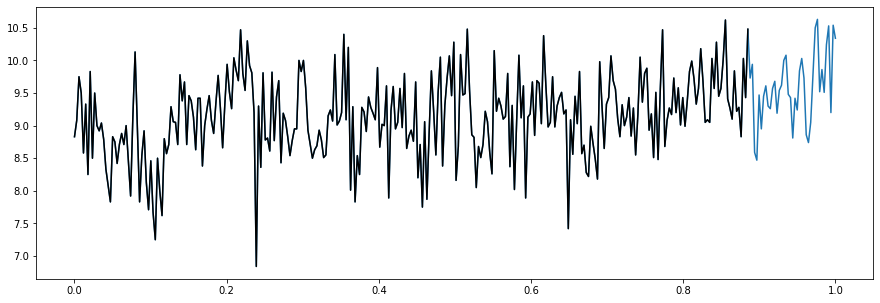

In [9]:
Z = X[:len(X)-40+1] 
t0 = t[:-40+1] 
plt.figure(figsize = (15, 5)) 
plt.plot(t, X) # исходный ВР 
plt.plot(t0, Z, 'k') # урезанный ряд
plt.show()

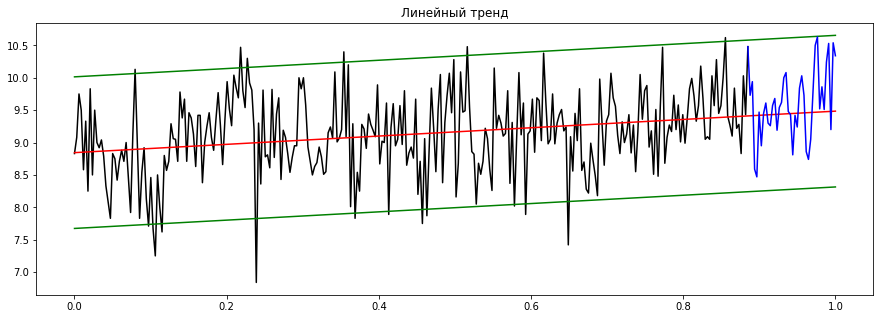

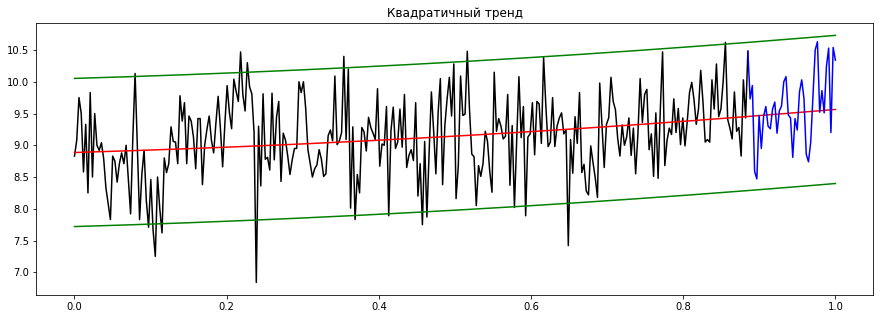

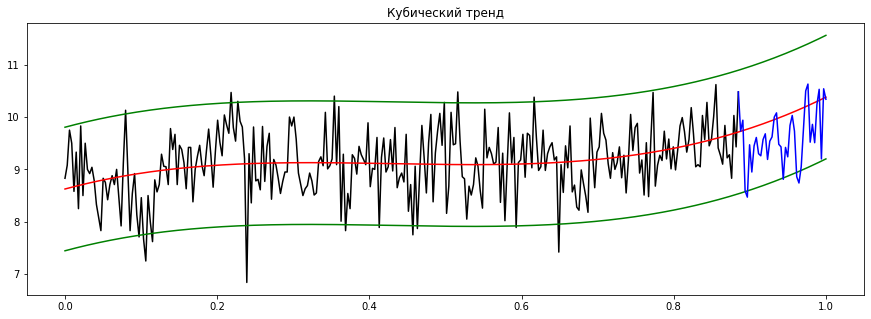

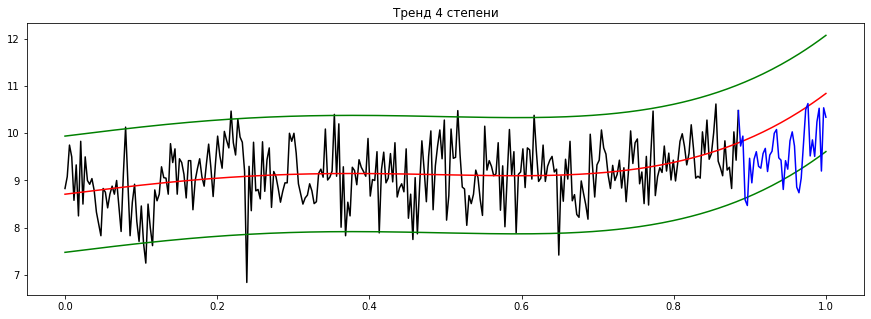

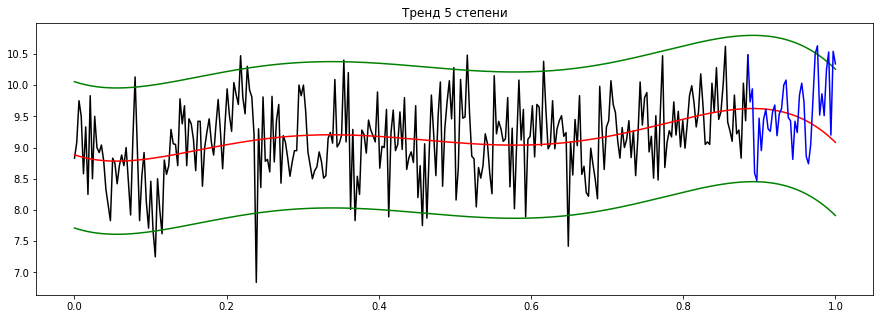

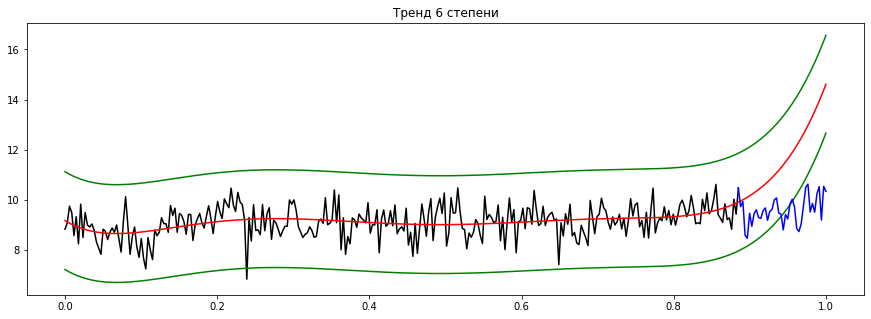

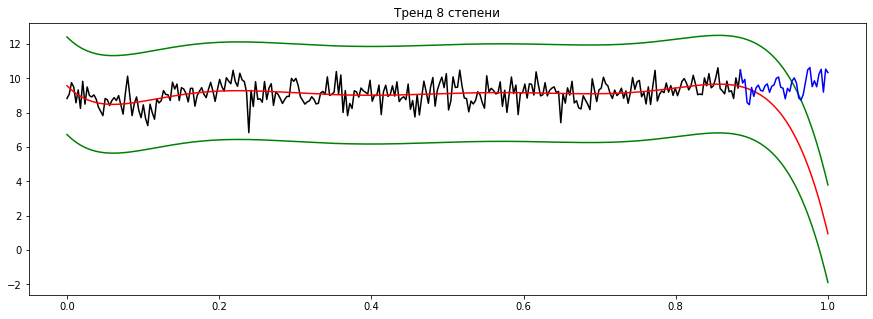

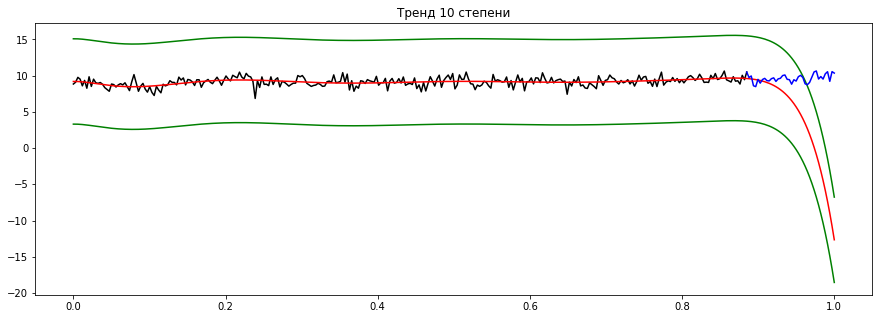

In [11]:
popt_pred1, pcov_pred1 = curve_fit(func_1, t0, Z)
popt_pred2, pcov_pred2 = curve_fit(func_2, t0, Z)
popt_pred3, pcov_pred3 = curve_fit(func_3, t0, Z)
popt_pred4, pcov_pred4 = curve_fit(func_4, t0, Z)
popt_pred5, pcov_pred5 = curve_fit(func_5, t0, Z)
popt_pred6, pcov_pred6 = curve_fit(func_6, t0, Z)
popt_pred8, pcov_pred8 = curve_fit(func_8, t0, Z)
popt_pred10, pcov_pred10 = curve_fit(func_10, t0, Z)


def calc_delta(func, X):
    return 1.96 * np.sqrt(np.sum((func-X)**2) / X.shape[0])

delta1 = calc_delta(func_1(t, popt_pred1[0], popt_pred1[1]), X)
delta2 = calc_delta(func_2(t, popt_pred2[0], popt_pred2[1], popt_pred2[2]), X)
delta3 = calc_delta(func_3(t, popt_pred3[0], popt_pred3[1], popt_pred3[2], popt_pred3[3]), X)
delta4 = calc_delta(func_4(t, popt_pred4[0], popt_pred4[1], popt_pred4[2], popt_pred4[3], popt_pred4[4]), X)
delta5 = calc_delta(func_5(t, popt_pred5[0], popt_pred5[1], popt_pred5[2], popt_pred5[3], popt_pred5[4], popt_pred5[5]), X)
delta6 = calc_delta(func_6(t, popt_pred6[0], popt_pred6[1], popt_pred6[2], popt_pred6[3], popt_pred6[4], popt_pred6[5], popt_pred6[6]), X)
delta8 = calc_delta(func_8(t, popt_pred8[0], popt_pred8[1], popt_pred8[2], popt_pred8[3], popt_pred8[4], popt_pred8[5], popt_pred8[6], popt_pred8[7], popt_pred8[8]), X)
delta10 = calc_delta(func_10(t, popt_pred10[0], popt_pred10[1], popt_pred10[2], popt_pred10[3], popt_pred10[4], popt_pred10[5], popt_pred10[6], popt_pred10[7], popt_pred10[8], popt_pred10[9], popt_pred10[10]), X)


plt.figure(figsize = (15, 5))
plt.plot(t0, Z, 'k')
plt.plot(t, func_1(t, popt_pred1[0], popt_pred1[1]), 'r')
plt.plot(t, func_1(t, popt_pred1[0], popt_pred1[1]) - delta1, 'g')
plt.plot(t, func_1(t, popt_pred1[0], popt_pred1[1]) + delta1, 'g')
plt.plot(t[-40:], X[-40:], 'b')
plt.title('Линейный тренд')
plt.show()

plt.figure(figsize = (15, 5))
plt.plot(t0, Z, 'k')
plt.plot(t, func_2(t, popt_pred2[0], popt_pred2[1], popt_pred2[2]), 'r')
plt.plot(t, func_2(t, popt_pred2[0], popt_pred2[1], popt_pred2[2]) - delta2, 'g')
plt.plot(t, func_2(t, popt_pred2[0], popt_pred2[1], popt_pred2[2]) + delta2, 'g')
plt.plot(t[-40:], X[-40:], 'b')
plt.title('Квадратичный тренд')
plt.show() 

plt.figure(figsize = (15, 5))
plt.plot(t0, Z, 'k')
plt.plot(t, func_3(t, popt_pred3[0], popt_pred3[1], popt_pred3[2], popt_pred3[3]), 'r')
plt.plot(t, func_3(t, popt_pred3[0], popt_pred3[1], popt_pred3[2], popt_pred3[3]) - delta3, 'g')
plt.plot(t, func_3(t, popt_pred3[0], popt_pred3[1], popt_pred3[2], popt_pred3[3]) + delta3, 'g')
plt.plot(t[-40:], X[-40:], 'b')
plt.title('Кубический тренд')
plt.show() 

plt.figure(figsize = (15, 5))
plt.plot(t0, Z, 'k')
plt.plot(t, func_4(t, popt_pred4[0], popt_pred4[1], popt_pred4[2], popt_pred4[3], popt_pred4[4]), 'r')
plt.plot(t, func_4(t, popt_pred4[0], popt_pred4[1], popt_pred4[2], popt_pred4[3], popt_pred4[4]) - delta4, 'g')
plt.plot(t, func_4(t, popt_pred4[0], popt_pred4[1], popt_pred4[2], popt_pred4[3], popt_pred4[4]) + delta4, 'g')
plt.plot(t[-40:], X[-40:], 'b')
plt.title('Тренд 4 степени')
plt.show() 

plt.figure(figsize = (15, 5))
plt.plot(t0, Z, 'k')
plt.plot(t, func_5(t, popt_pred5[0], popt_pred5[1], popt_pred5[2], popt_pred5[3], popt_pred5[4], popt_pred5[5]), 'r')
plt.plot(t, func_5(t, popt_pred5[0], popt_pred5[1], popt_pred5[2], popt_pred5[3], popt_pred5[4], popt_pred5[5]) - delta5, 'g')
plt.plot(t, func_5(t, popt_pred5[0], popt_pred5[1], popt_pred5[2], popt_pred5[3], popt_pred5[4], popt_pred5[5]) + delta5, 'g')
plt.plot(t[-40:], X[-40:], 'b')
plt.title('Тренд 5 степени')
plt.show()

plt.figure(figsize = (15, 5))
plt.plot(t0, Z, 'k')
plt.plot(t, func_6(t, popt_pred6[0], popt_pred6[1], popt_pred6[2], popt_pred6[3], popt_pred6[4], popt_pred6[5], popt_pred6[6]), 'r')
plt.plot(t, func_6(t, popt_pred6[0], popt_pred6[1], popt_pred6[2], popt_pred6[3], popt_pred6[4], popt_pred6[5], popt_pred6[6]) - delta6, 'g')
plt.plot(t, func_6(t, popt_pred6[0], popt_pred6[1], popt_pred6[2], popt_pred6[3], popt_pred6[4], popt_pred6[5], popt_pred6[6]) + delta6, 'g')
plt.plot(t[-40:], X[-40:], 'b')
plt.title('Тренд 6 степени')
plt.show()

plt.figure(figsize = (15, 5))
plt.plot(t0, Z, 'k')
plt.plot(t, func_8(t, popt_pred8[0], popt_pred8[1], popt_pred8[2], popt_pred8[3], popt_pred8[4], popt_pred8[5], popt_pred8[6], popt_pred8[7], popt_pred8[8]), 'r')
plt.plot(t, func_8(t, popt_pred8[0], popt_pred8[1], popt_pred8[2], popt_pred8[3], popt_pred8[4], popt_pred8[5], popt_pred8[6], popt_pred8[7], popt_pred8[8]) - delta8, 'g')
plt.plot(t, func_8(t, popt_pred8[0], popt_pred8[1], popt_pred8[2], popt_pred8[3], popt_pred8[4], popt_pred8[5], popt_pred8[6], popt_pred8[7], popt_pred8[8]) + delta8, 'g')
plt.plot(t[-40:], X[-40:], 'b')
plt.title('Тренд 8 степени')
plt.show()

plt.figure(figsize = (15, 5))
plt.plot(t0, Z, 'k')
plt.plot(t, func_10(t, popt_pred10[0], popt_pred10[1], popt_pred10[2], popt_pred10[3], popt_pred10[4], popt_pred10[5], popt_pred10[6], popt_pred10[7], popt_pred10[8], popt_pred10[9], popt_pred10[10]), 'r')
plt.plot(t, func_10(t, popt_pred10[0], popt_pred10[1], popt_pred10[2], popt_pred10[3], popt_pred10[4], popt_pred10[5], popt_pred10[6], popt_pred10[7], popt_pred10[8], popt_pred10[9], popt_pred10[10]) - delta10, 'g')
plt.plot(t, func_10(t, popt_pred10[0], popt_pred10[1], popt_pred10[2], popt_pred10[3], popt_pred10[4], popt_pred10[5], popt_pred10[6], popt_pred10[7], popt_pred10[8], popt_pred10[9], popt_pred10[10]) + delta10, 'g')
plt.plot(t[-40:], X[-40:], 'b')
plt.title('Тренд 10 степени')
plt.show()

Полиномы больших порядков довольно плохо спрогнозировали ВР, чего не скажешь про полиномы порядка < 6.

## 7. Постройте прогноз данных с помощью ARIMA модели:

Прежде, чем строить модели ARIMA, приведем ВР к тренд-стационарной форме. Для этого вычтем из него тренд 5-го порядка, поскольку он лучше спрогнозировал исходный ВР: 

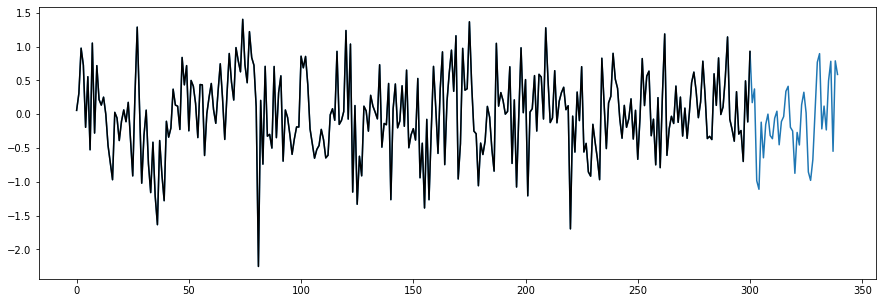

In [12]:
t = np.arange(0, len(X), 1)
t0 = t[:-40+1]

popt_5, pcov_5 = curve_fit(func_5, t, X)

X_minus_trend = X - func_5(t, popt_5[0], popt_5[1], popt_5[2], popt_5[3], popt_5[4], popt_5[5])
Z_minus_trend = X_minus_trend[:len(X_minus_trend)-40+1]

plt.figure(figsize = (15, 5)) 
plt.plot(t, X_minus_trend)
plt.plot(t0, Z_minus_trend, 'k')
plt.show()

Проверим ряд на стационарность

In [13]:
tsa.kpss(X_minus_trend)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.033402521160603,
 0.1,
 17,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

Статистика близка к нулю, а значение p > 0.05. Приведенный к нулю ряд стационарен.

Перейдем к подбору модели ARIMA:

In [14]:
from statsmodels.tsa.arima_model import ARIMA

arimaz = ARIMA(Z_minus_trend, order = (1, 0, 0)) 
model_fit100 = arimaz.fit(disp = False) # подгоняем под ВР 
print(model_fit100.summary())

arimaz = ARIMA(Z_minus_trend, order = (0, 0, 1)) 
model_fit001 = arimaz.fit(disp = False) # подгоняем под ВР 
print(model_fit001.summary())

arimaz = ARIMA(Z_minus_trend, order = (1, 0, 1)) 
model_fit101 = arimaz.fit(disp = False) # подгоняем под ВР 
print(model_fit101.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  301
Model:                     ARMA(1, 0)   Log Likelihood                -265.996
Method:                       css-mle   S.D. of innovations              0.586
Date:                Sun, 22 May 2022   AIC                            537.991
Time:                        18:06:15   BIC                            549.112
Sample:                             0   HQIC                           542.441
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0126      0.041      0.311      0.756      -0.067       0.092
ar.L1.y        0.1700      0.057      2.986      0.003       0.058       0.282
                                    Roots           

In [15]:
arimaz = ARIMA(Z_minus_trend, order = (1, 0, 2)) 
model_fit102 = arimaz.fit(disp = False) # подгоняем под ВР 
print(model_fit102.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  301
Model:                     ARMA(1, 2)   Log Likelihood                -260.746
Method:                       css-mle   S.D. of innovations              0.575
Date:                Sun, 22 May 2022   AIC                            531.492
Time:                        18:06:30   BIC                            550.027
Sample:                             0   HQIC                           538.909
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0147      0.052      0.279      0.780      -0.088       0.117
ar.L1.y        0.6190      0.180      3.443      0.001       0.267       0.971
ma.L1.y       -0.4885      0.187     -2.608      0.0

In [16]:
arimaz = ARIMA(Z_minus_trend, order = (2, 0, 1)) 
model_fit201 = arimaz.fit(disp = False) # подгоняем под ВР 
print(model_fit201.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  301
Model:                     ARMA(2, 1)   Log Likelihood                -260.627
Method:                       css-mle   S.D. of innovations              0.575
Date:                Sun, 22 May 2022   AIC                            531.254
Time:                        18:06:38   BIC                            549.789
Sample:                             0   HQIC                           538.671
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0145      0.052      0.278      0.781      -0.088       0.117
ar.L1.y        0.4132      0.317      1.303      0.194      -0.208       1.035
ar.L2.y        0.1336      0.090      1.485      0.1

In [17]:
arimaz = ARIMA(Z_minus_trend, order = (2, 0, 2)) 
model_fit202 = arimaz.fit(disp = False) # подгоняем под ВР  
print(model_fit202.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  301
Model:                     ARMA(2, 2)   Log Likelihood                -259.640
Method:                       css-mle   S.D. of innovations              0.573
Date:                Sun, 22 May 2022   AIC                            531.279
Time:                        18:06:41   BIC                            553.522
Sample:                             0   HQIC                           540.180
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0146      0.053      0.276      0.783      -0.089       0.118
ar.L1.y       -0.0903      0.186     -0.486      0.628      -0.454       0.274
ar.L2.y        0.5199      0.150      3.455      0.0

In [18]:
arimaz = ARIMA(Z_minus_trend, order = (1, 1, 3)) 
model_fit113 = arimaz.fit(disp = False) # подгоняем под ВР 
print(model_fit113.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  300
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -264.937
Method:                       css-mle   S.D. of innovations              0.580
Date:                Sun, 22 May 2022   AIC                            541.874
Time:                        18:06:45   BIC                            564.097
Sample:                             1   HQIC                           550.768
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.518      0.605      -0.001       0.001
ar.L1.D.y     -0.6489      0.224     -2.897      0.004      -1.088      -0.210
ma.L1.D.y     -0.2053      0.230     -0.894      0.3

In [19]:
arimaz = ARIMA(Z_minus_trend, order = (1, 1, 4)) 
model_fit114 = arimaz.fit(disp = False) # подгоняем под ВР  
print(model_fit114.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  300
Model:                 ARIMA(1, 1, 4)   Log Likelihood                -263.850
Method:                       css-mle   S.D. of innovations              0.577
Date:                Sun, 22 May 2022   AIC                            541.700
Time:                        18:06:50   BIC                            567.627
Sample:                             1   HQIC                           552.076
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.503      0.615      -0.001       0.001
ar.L1.D.y     -0.9849      0.012    -81.715      0.000      -1.009      -0.961
ma.L1.D.y      0.1280      0.060      2.122      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [20]:
arimaz = ARIMA(Z_minus_trend, order = (3, 1, 1)) 
model_fit311 = arimaz.fit(disp = False, trend='nc') # подгоняем под ВР  
print(model_fit311.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  300
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -262.862
Method:                       css-mle   S.D. of innovations              0.576
Date:                Sun, 22 May 2022   AIC                            535.724
Time:                        18:06:54   BIC                            554.243
Sample:                             1   HQIC                           543.135
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.1380      0.058      2.384      0.018       0.025       0.252
ar.L2.D.y      0.1841      0.057      3.202      0.002       0.071       0.297
ar.L3.D.y      0.0246      0.058      0.424      0.6

In [21]:
arimaz = ARIMA(Z_minus_trend, order = (4, 2, 2)) 
model_fit422 = arimaz.fit(disp = False) # подгоняем под ВР 
print(model_fit422.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  299
Model:                 ARIMA(4, 2, 2)   Log Likelihood                -267.672
Method:                       css-mle   S.D. of innovations              0.575
Date:                Sun, 22 May 2022   AIC                            551.344
Time:                        18:07:00   BIC                            580.947
Sample:                             2   HQIC                           563.192
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.257e-06   1.67e-05      0.554      0.580   -2.35e-05     4.2e-05
ar.L1.D2.y     0.1382      0.058      2.365      0.019       0.024       0.253
ar.L2.D2.y     0.1697      0.059      2.895      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Можно заметить, что при увеличении значений параметров АР и СС растут и значения информационных критериев. Лучшей моделью по BIC оказалась АРСС(1, 1)

<Figure size 1080x360 with 0 Axes>

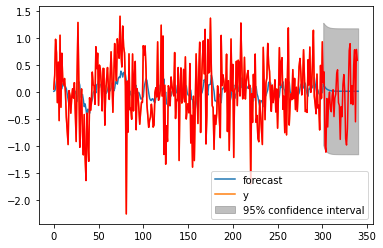

In [22]:
plt.figure(figsize = (15, 5))
model_fit101.plot_predict(0, len(X)) # прогноз по АРПСС
plt.plot(t, X_minus_trend, 'r') # исходный ВР минус тренд
plt.show()

Прогноз получился не очень

## 8. Если  в  ряде отсутствуют явные  периодические  составляющие – постройте тренд с помощью методов вейвлет-анализа и SSA.

In [23]:
import pywt

wvlt = pywt.Wavelet('dmey')
print(pywt.dwt_max_level(len(X), wvlt))

t = np.linspace(0, 1, len(X))

2


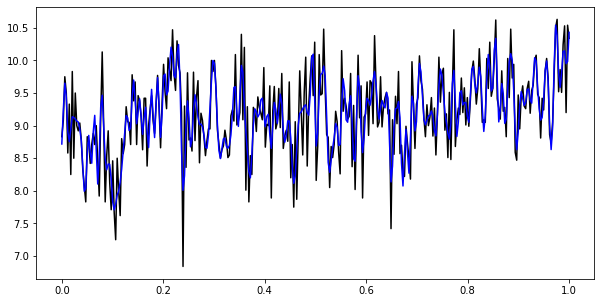

In [24]:
cA2, cD2, cD1 = pywt.wavedec(X, wvlt, level=2)

Fre = pywt.waverec((cA2, cD2, None), wvlt)

plt.figure(figsize = (10, 5))
plt.plot(t, X, 'k')
plt.plot(t, Fre[-len(X):], 'b')
plt.show()

## 9. Постройте прогноз ряда  с  помощью  рекурсивного  метода Сингулярного Спектрального Анализа SSA-R.

In [25]:
def SSA_modes(F, L):
    N = len(F)
    K = N - L + 1
    X = np.empty((L, K))
    for i in range (L):
        for j in range (K):
            X[i][j] = F[i + j]
    S = np.dot(X, X.T)
    U, A, _ = np.linalg.svd(S)
    V = np.dot(X.T, U)
    return A, U, V

def SSA_group(A, U, V, N, I):
    L = len(A)
    K = N - L + 1
    V = V.transpose()
    Z = np.dot(U[:, I], V[I, :])
    G = np.zeros(N)
    L_ = min(L, K)
    K_ = max(L, K)
    for k in range(L_ - 1):
        z = 0
        for m in range(k + 1):
            z += Z[m][k - m]
        G[k] = z / (k + 1)
    for k in range(L_ - 1, K_):
        z = 0
        for m in range(L_):
            z += Z[m][k - m]
        G[k] = z / L_
    for k in range(K_, N):
        z = 0
        for m in range(k - K_ + 1, N - K_ + 1):
            z += Z[m][k - m]
        G[k] = z / (N - k)
    
    return G

def SSA_R(F, L, I, M):
    N = len(F)
    A, U, V = SSA_modes(F, L)
    G = SSA_group(A, U, V, len(F), I) #ВР, восстановленный методом SSA по группировке I компонент
    
    vu = np.linalg.norm(U[-1, I]) # норма последнего вектора из матрицы U для заданной группировки компонент
    R = np.sum(U[L - 1, I] * U[0:L - 1, I], 1)
    R = R / (1 - vu * vu) # ряд весовых коэффициентов
    Q = np.zeros(N + M)
    for i in range(N+M):
        q=0
        if (i < N):
            Q[i] = G[i]
        else:
            for j in range(L-2):
                q = q + R[j]*Q[i-j-1]
            Q[i] = q
    return Q

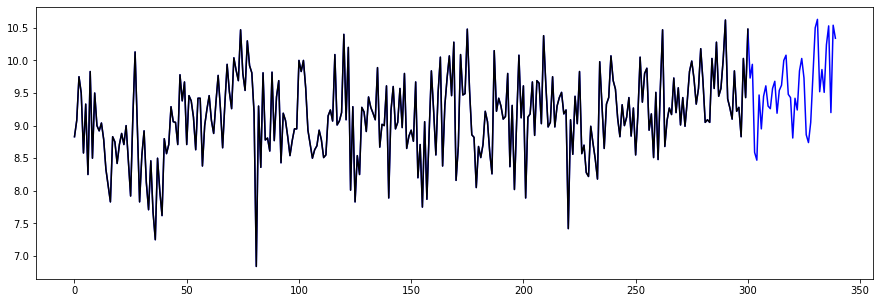

In [26]:
Z = X[:len(X)-40+1]
plt.figure(figsize = (15, 5))
plt.plot(X, 'b')
plt.plot(Z, 'k')
plt.show()

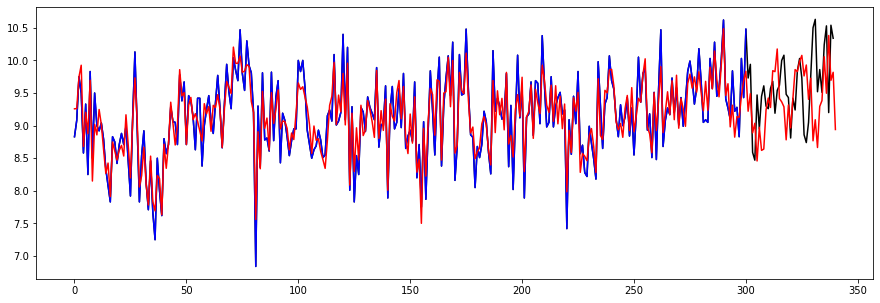

In [27]:
plt.figure(figsize = (15, 5))
plt.plot(X, 'k')
plt.plot(Z, 'b')
plt.plot(SSA_R(Z, 75, [i for i in range(37)], 40), 'r')
plt.show()

Прогноз получился более удачным, чем в предыдущих случаях

## 10. Постройте прогноз данных с помощью нейронной сети LSTM:

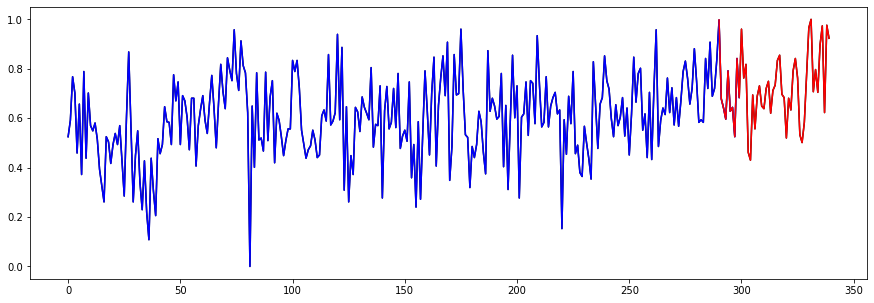

In [120]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

X = np.array(data)
X = X.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
F = scaler.fit_transform(X)
F_tr = F[:300]
F_test = F[290:]

plt.figure(figsize = (15, 5))
plt.plot(F, 'k')
plt.plot(np.r_[:300], F_tr, 'b')
plt.plot(np.r_[290:340],F_test, 'r')
plt.show()

In [119]:
from keras.preprocessing.sequence import TimeseriesGenerator

data_gen = TimeseriesGenerator(F_tr, F_tr, length=10, sampling_rate=1, batch_size=300)
batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 290 точек обучения, прогноз 1 точки по 10 прошлым
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

(290, 10, 1)
(290, 1, 10)
(290, 1)


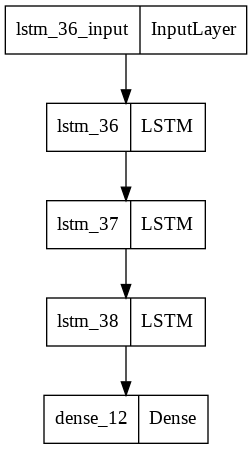

In [121]:
from keras.utils.vis_utils import plot_model

model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(1, 10)))
model.add(LSTM(units=130, return_sequences=True))
model.add(LSTM(units=110))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
plot_model(model, to_file='model.png')

In [122]:
model.fit(xx, yy, epochs = 200) # 100 эпох по 280 точек

Epoch 1/200
10/10 [==============================] - 8s 10ms/step - loss: 0.3414
Epoch 2/200
10/10 [==============================] - 0s 10ms/step - loss: 0.1356
Epoch 3/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0487
Epoch 4/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0295
Epoch 5/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0264
Epoch 6/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0259
Epoch 7/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0251
Epoch 8/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0251
Epoch 9/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0251
Epoch 10/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0258
Epoch 11/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0258
Epoch 12/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 13/200
10/10 [========

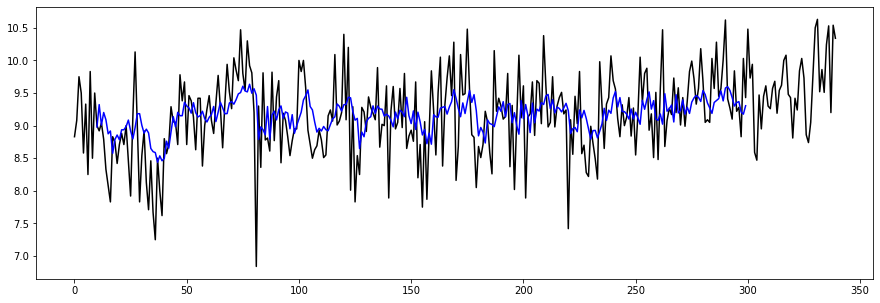

In [124]:
trainPredict = model.predict(xx)
trainPredict = scaler.inverse_transform(trainPredict)
plt.figure(figsize = (15, 5))
plt.plot(X, 'k')
plt.plot(np.r_[10:300],trainPredict, 'b')
plt.show()

In [126]:
data_gen = TimeseriesGenerator(F_test, F_test,
length=10, sampling_rate=1,
batch_size=300)
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) # прогноз на 40 точек по 10 наблюдениям
print(yy.shape) #

(40, 1, 10)
(40, 1)


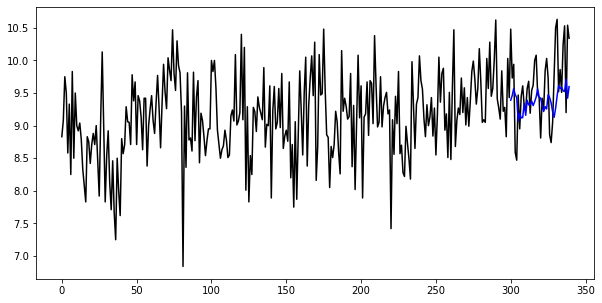

In [127]:
testPredict = model.predict(xx)
testPredict = scaler.inverse_transform(testPredict)
plt.figure(figsize = (10, 5))
plt.plot(X, 'k')
plt.plot(np.r_[300:340],testPredict, 'b')
plt.show()

In [152]:
look_back = 20
pred_size = 40
threshold = len(X) - pred_size

X = np.array(data)
X_train = X[:-pred_size]
X_test = X[-pred_size-look_back:]

scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train.reshape(-1, 1))
X_test = scaler.transform(X_test.reshape(-1, 1))

In [153]:
train_data_gen = TimeseriesGenerator(X_train, 
                                     X_train,
                                     length=look_back, 
                                     sampling_rate=1,
                                     stride=1,
                                     batch_size=3)

test_data_gen = TimeseriesGenerator(X_test, 
                                    X_test,
                                    length=look_back, 
                                    sampling_rate=1,
                                    stride=1,
                                    batch_size=1)

In [155]:
def build_model(hp):
  model = Sequential()

  model.add(LSTM(hp.Int('input_unit', min_value=35, max_value=100, step=10), 
                 return_sequences=True, 
                 input_shape=(train_data_gen[0][0].shape[1], (train_data_gen[0][0].shape[2]))))
  
  for i in range(hp.Int('n_layers', 1, 3)):
    model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=35,max_value=100,step=10), 
                   return_sequences=True))

  model.add(LSTM(hp.Int('layer_2_neurons', min_value=35, max_value=50, step=10)))
  
  model.add(Dropout(hp.Float('Dropout_rate', min_value=0, max_value=0.5, step=0.1)))

  model.add(Dense(train_data_gen[0][1].shape[1], 
                  activation=hp.Choice('dense_activation', values=['relu', 'sigmoid'], default='relu')))
  
  model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse'])
  return model

In [156]:
!pip install keras_tuner
from keras_tuner import RandomSearch
tuner= RandomSearch(
        build_model,
        objective='mse',
        max_trials=2,
        executions_per_trial=1,
        directory='final task3',
        project_name='LSTM_tuner')

In [157]:
tuner.search(
        train_data_gen,
        epochs=10,
        batch_size=30,
        validation_data=test_data_gen)

Trial 2 Complete [00h 01m 00s]
mse: 0.02699718065559864

Best mse So Far: 0.02699718065559864
Total elapsed time: 00h 02m 14s
INFO:tensorflow:Oracle triggered exit


Results summary
Results in final task3/LSTM_tuner
Showing 10 best trials
Trial summary
Hyperparameters:
input_unit: 95
n_layers: 1
lstm_0_units: 45
layer_2_neurons: 45
Dropout_rate: 0.2
dense_activation: sigmoid
lstm_1_units: 65
Score: 0.02699718065559864
Trial summary
Hyperparameters:
input_unit: 95
n_layers: 2
lstm_0_units: 95
layer_2_neurons: 45
Dropout_rate: 0.0
dense_activation: relu
lstm_1_units: 35
Score: 0.39804601669311523
None


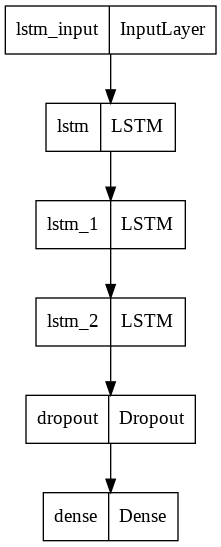

In [158]:
best_model = tuner.get_best_models(num_models=1)[0]
print(tuner.results_summary())
plot_model(best_model, to_file='model.png')

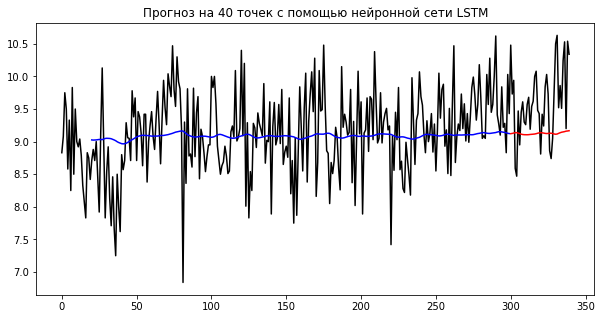

In [159]:
trainPredict = best_model.predict(train_data_gen)
testPredict = best_model.predict(test_data_gen)

trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

plt.figure(figsize = (10, 5))
plt.plot(X, 'k')
plt.plot(np.r_[look_back:threshold], trainPredict,'b')
plt.plot(np.r_[threshold:F.shape[0]], testPredict, 'r')
plt.title(f"Прогноз на {pred_size} точек с помощью нейронной сети LSTM")
plt.show()